In [2]:
import pandas as pd
pd.options.display.max_columns=200
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn.metrics import adjusted_rand_score

In [3]:
data = pd.read_csv('data_RFM.csv')

In [4]:
data.head()

,Unnamed: 0,customer_unique_id,frequency,recency,amount_spent
0,0,7c396fd4830fd04220f754e42b4e5bff,2,335,65.38
1,3,af07308b275d755c9edb36a90c618231,1,40,118.70
2,4,3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90
3,5,7c142cf63193a1473d2e66489a9ae977,1,288,45.00
4,6,72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.set_index('customer_unique_id', inplace=True)

In [6]:
data['recency'].max()

728

In [7]:
#Separate the dataframe in range of 2 weeks of recency
for i in range(1, 53):
    data['recency_{}'.format(i)] = data['recency'].apply(lambda x: 1 if (x <= i*14) else 0)

In [8]:
data.head()

,frequency,recency,amount_spent,recency_1,recency_2,recency_3,recency_4,recency_5,recency_6,recency_7,recency_8,recency_9,recency_10,recency_11,recency_12,recency_13,recency_14,recency_15,recency_16,recency_17,recency_18,recency_19,recency_20,recency_21,recency_22,recency_23,recency_24,recency_25,recency_26,recency_27,recency_28,recency_29,recency_30,recency_31,recency_32,recency_33,recency_34,recency_35,recency_36,recency_37,recency_38,recency_39,recency_40,recency_41,recency_42,recency_43,recency_44,recency_45,recency_46,recency_47,recency_48,recency_49,recency_50,recency_51,recency_52
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7c396fd4830fd04220f754e42b4e5bff,2,335,65.38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
af07308b275d755c9edb36a90c618231,1,40,118.70,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3a653a41f6f9fc3d2a113cf8398680e8,1,26,159.90,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7c142cf63193a1473d2e66489a9ae977,1,288,45.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
72632f0f9dd73dfee390c9b22eb56dd6,1,201,19.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [9]:
data.loc[data['recency_49'] == 1].shape

(95121, 55)

In [10]:
#value counts of the recency_1 column
data['recency_21'].value_counts()

1    63602
0    31818
Name: recency_21, dtype: int64

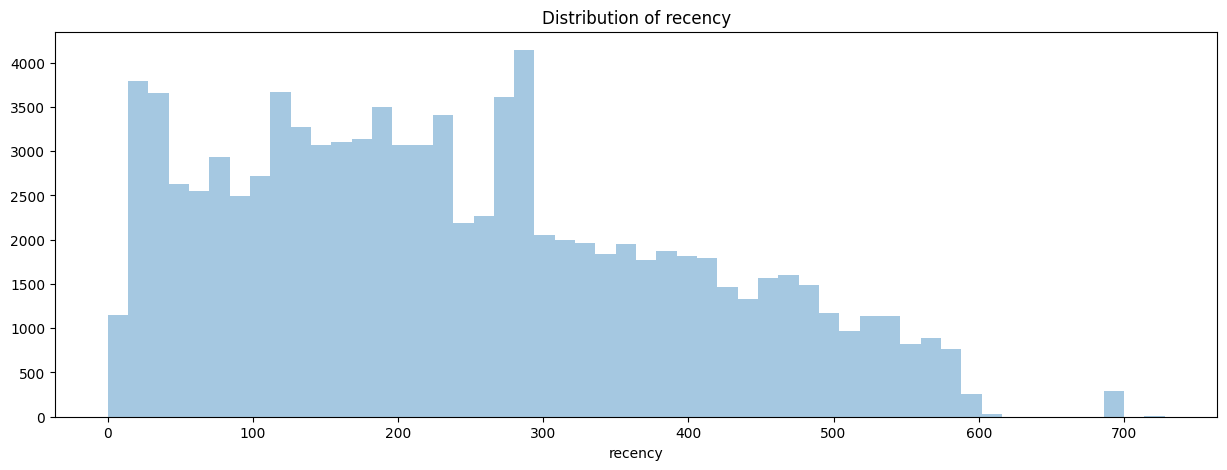

In [11]:
#plot distribution of recency
plt.figure(figsize=(15, 5))
sns.distplot(data['recency'], kde=False, bins=52)
plt.title('Distribution of recency')
plt.show()

In [12]:
# create a dictionary of dataframes for each recency range
data_dict = {}
for i in range(1, 53):
    data_dict[i] = data.loc[data['recency_{}'.format(i)] == 1, ['recency', 'frequency', 'amount_spent']]

In [13]:
data_dict[21]

,recency,frequency,amount_spent
customer_unique_id,,,
af07308b275d755c9edb36a90c618231,40,1,118.70
3a653a41f6f9fc3d2a113cf8398680e8,26,1,159.90
7c142cf63193a1473d2e66489a9ae977,288,1,45.00
72632f0f9dd73dfee390c9b22eb56dd6,201,1,19.90
e97109680b052ee858d93a539597bba7,87,1,31.90
...,...,...,...
324a22205906aa2612a33e63c00ca8bb,182,1,55.00
a49e8e11e850592fe685ae3c64b40eca,256,1,55.90
da62f9e57a76d978d02ab5362c509660,208,1,174.90


In [14]:
#Kmeans on every data_dict
kmeans_dict = {}
for i in range(1, 53):
      kmeans_dict[i] = KMeans(n_clusters=4, random_state=42).fit(data_dict[i])

#Calculate the ARI score for every kmeans
ari_dict = {}
for i in range(1, 53):
      ari_dict[i] = adjusted_rand_score(data_dict[i]['recency'], kmeans_dict[i].labels_)
      
#plot the ARI score
plt.figure(figsize=(15, 5))
plt.plot(list(ari_dict.keys()), list(ari_dict.values()))
plt.title('ARI score for each recency range')
plt.show()